# Faceting Plots with  `sns.FacetGrid()` and `.map()`

**Multiple copies of the same type of plot visualized on different subsets of the data.**


[Faceting using sns.FacetGrid()]()

In [11]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

### Example 1: Using faceting as an alternative way to violin plot.

___Context:___

Study on the distribution pattern of `comb` by each type of car.

To achieve:

- Compare violin plots and facet plots
- Resize the bins
- Parameters: `col_wrap` and `sharey`

In [13]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [15]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

**Previously we have explore the shape of the data using violin plot.**

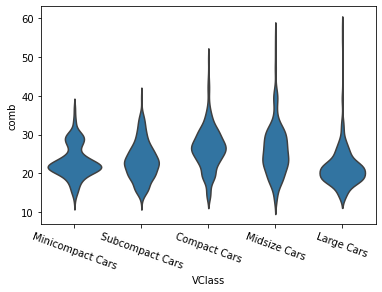

In [26]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=sns.color_palette()[0], inner=None)
plt.xticks(rotation=-20);

**Next, use `sns.FacetGrid()` and `.map()` methods to make facet plots.**

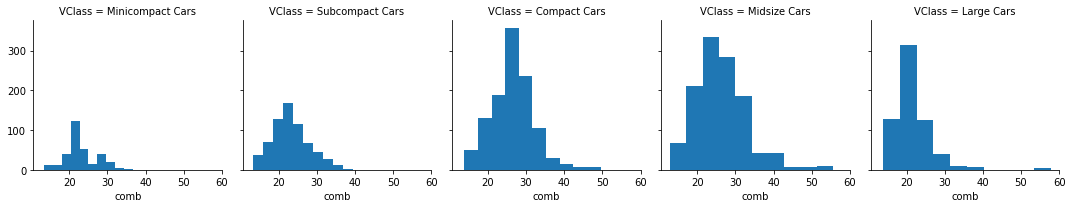

In [18]:
g = sns.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb');

___Notice:___

If set `sharey=False`:

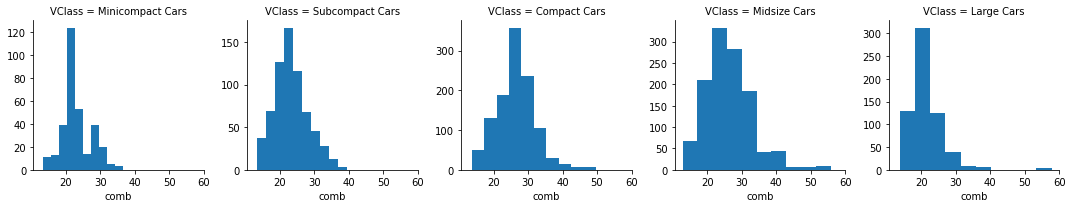

In [27]:
g = sns.FacetGrid(data=fuel_econ, col='VClass', sharey=False)
g.map(plt.hist, 'comb');

**Furthermore, resize the bin size ...**

In [30]:
fuel_econ.groupby('VClass').comb.describe().T

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
count,321.000000,673.000000,1122.000000,1188.000000,625.000000
mean,23.152877,23.303826,26.504232,26.180177,21.519717
std,4.240233,4.871526,5.558006,6.807304,5.000261
min,13.384900,13.311700,13.780100,12.821700,13.863400
25%,20.755000,19.632500,23.131750,21.608875,18.627700
50%,22.100000,22.980100,26.494650,25.503150,20.978200
75%,25.358800,26.124600,29.878200,29.843900,22.837700
max,36.612200,39.485000,49.568500,55.700000,57.782400


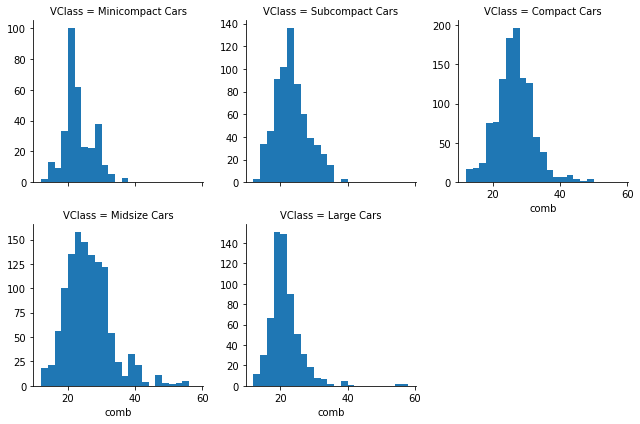

In [36]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

### Example 3: Use Facet Plots to Study on the Data Distribution of `trans`  by Car Types. 

- Use `col_wrap` parameter to control the maximum number of graph per row.
- Use `col_order` parameter to control the ordering of each facet plot.

In [37]:
# How many `trans` types are there?
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Automatic 6-spd                     126
Manual 5-spd                        126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S7)                    43
Automatic (AV-S6)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


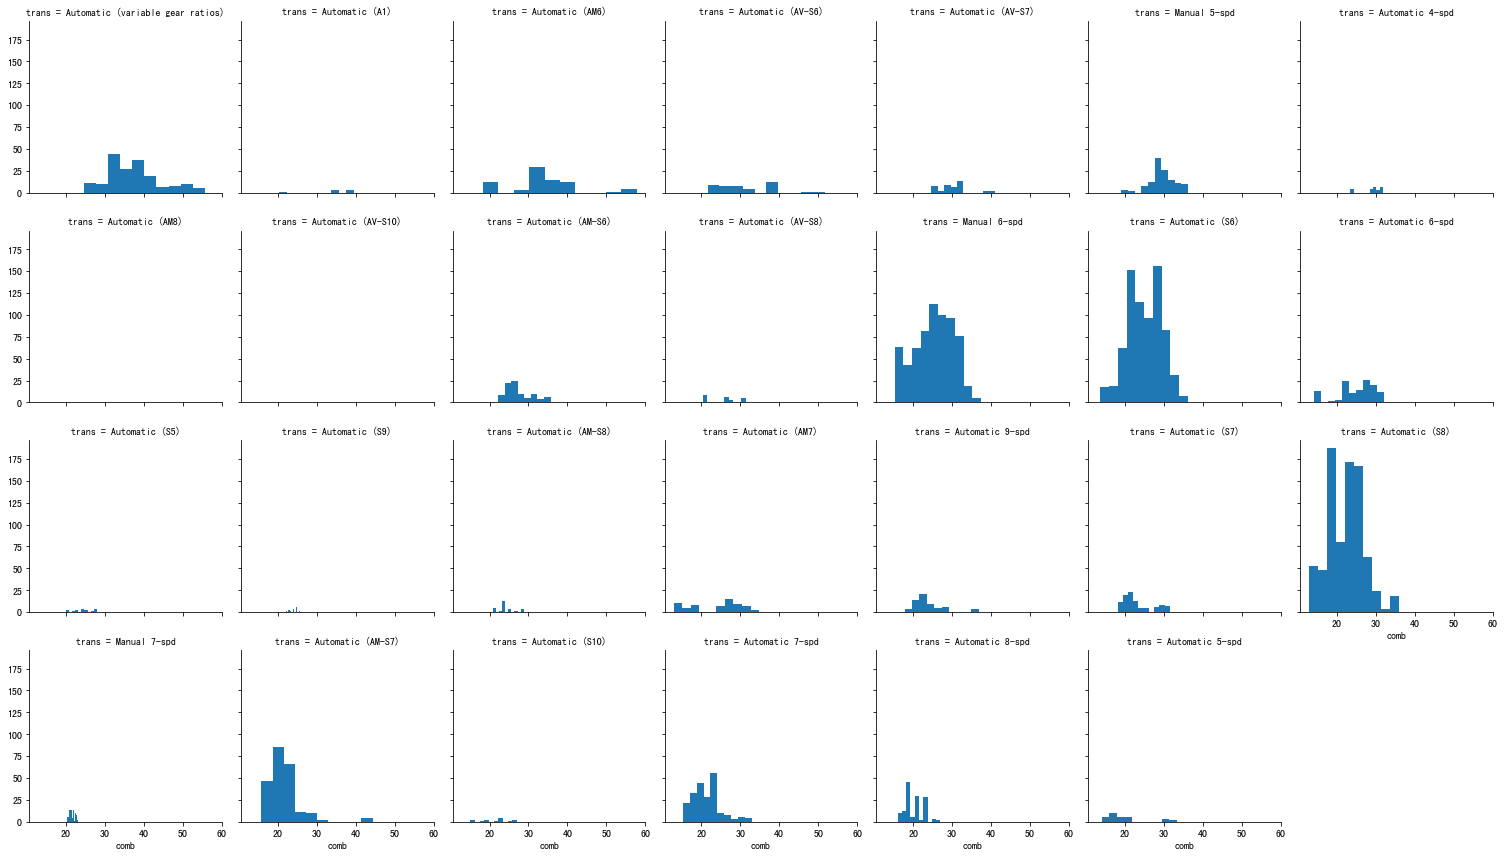

In [13]:
# Find the order in which we want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb');

### Example 4: Use facet plots to study on the distribution of car efficiency made by different manufacturers.

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.

___STEPS:___

**Step 1. Filter out the manufacturers who made cars more than 80 in the dataset.**

**Step 2. Order these manufacturers by average mpg (miles per gallon) in descending order.**

**Step 3: Facet Plotting using `plt.hist()`.**

**Step 4: Try both with `plt.hist()` function and `sns.distplot()` function, considering absolute frequency and relative frequency.**

---


#### Step 1: Filter out the manufacturers who made cars more than 80 in the dataset.

In [71]:
fuel_econ[fuel_econ['make'].isin(make_freq_idx)].

BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
Audi             201
MINI             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: make, dtype: int64

In [84]:
threshold = 80

make_freq_mask = fuel_econ['make'].value_counts() > Threshold

n_make_freq = np.sum(make_freq_mask)

make_freq_idx = fuel_econ['make'].value_counts()[make_freq_mask].index

most_makes = fuel_econ[fuel_econ['make'].isin(make_freq_idx)]

print("There are {} manufacturers with output beyond {}.\n".format(n_make_freq, threshold))
print("These manufactureres are: \n{}".format('\n'.join(make_freq_idx)))

There are 18 manufacturers with output beyond 80.

These manufactureres are: 
BMW
Mercedes-Benz
Porsche
Ford
Chevrolet
Audi
MINI
Volkswagen
Hyundai
Dodge
Lexus
Kia
Cadillac
Toyota
Infiniti
Honda
Jaguar
Mazda


#### Step 2. Order these manufacturers by average mpg (miles per gallon) in descending order.

In [90]:
make_means = most_makes.groupby('make')['comb'].mean()

facet_order = make_means.sort_values(ascending=False).index

print("Ordered by average efficiency (in descending order): \n{}".format('\n'.join(facet_order)))

Ordered by average efficiency (in descending order): 
Toyota
Honda
Mazda
Hyundai
Kia
MINI
Volkswagen
Chevrolet
Ford
Lexus
Audi
BMW
Infiniti
Dodge
Cadillac
Mercedes-Benz
Porsche
Jaguar


#### Step 3: Facet Plotting using plt.hist().

In [91]:
# Review the summary statistics of the `comb` to determine which bin width value to take.
most_makes.comb.describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

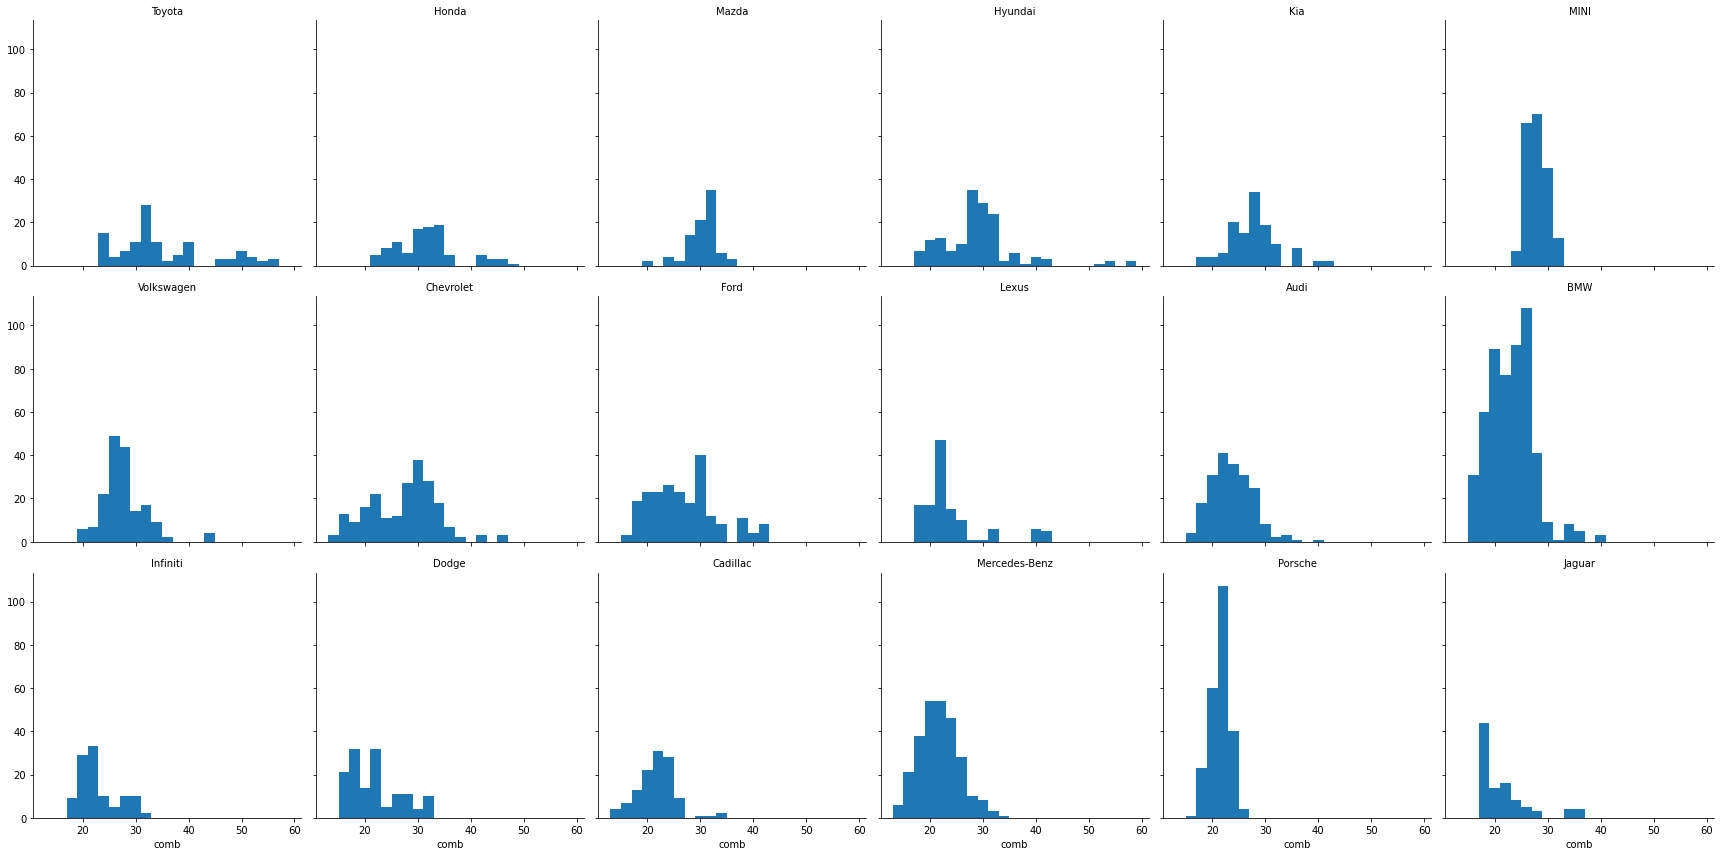

In [116]:
# Determine the bin width
lower_bound, upper_bound =  np.floor(most_makes.comb.min()), np.ceil(most_makes.comb.max())
bin_width = 2
bin_edges = np.arange(lower_bound, upper_bound+bin_width, bin_width)

g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(plt.hist, 'comb', bins=bin_edges)
g.set_titles('{col_name}');

#### Step 4: Try both with `plt.hist()` function and `sns.distplot()` function, considering absolute frequency and relative frequency.

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

<br>

**Trial 1: Use `plt.hist(density=True)`**

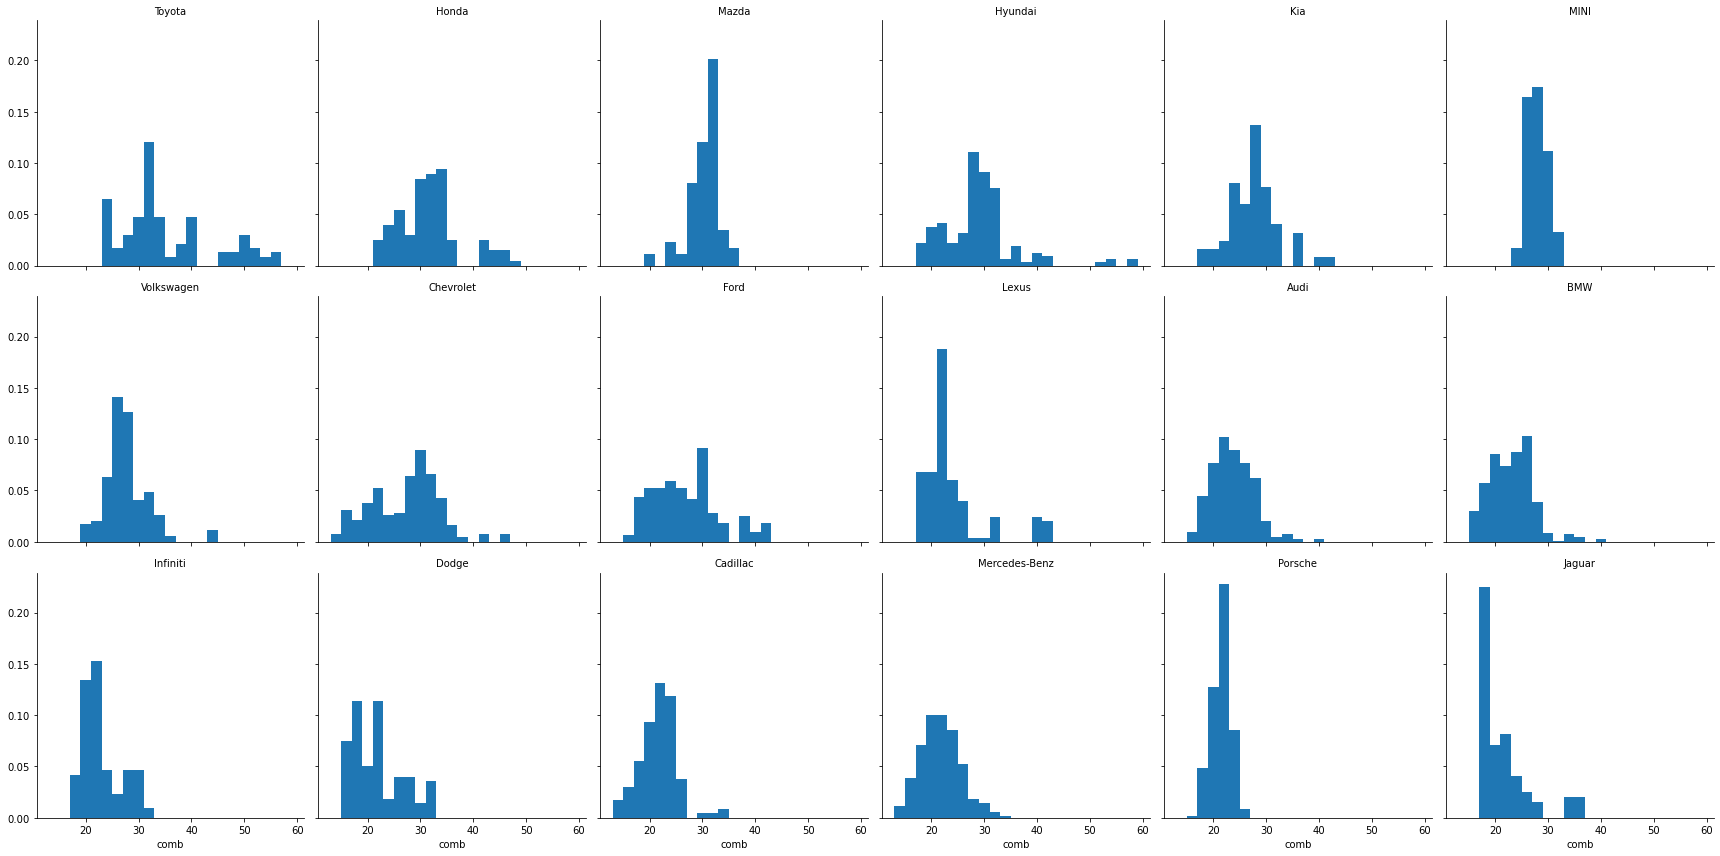

In [118]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(plt.hist, 'comb', bins=bin_edges, density=True)
g.set_titles('{col_name}');

**Trial 2: Use `sns.histplot(stat='count')` function.**

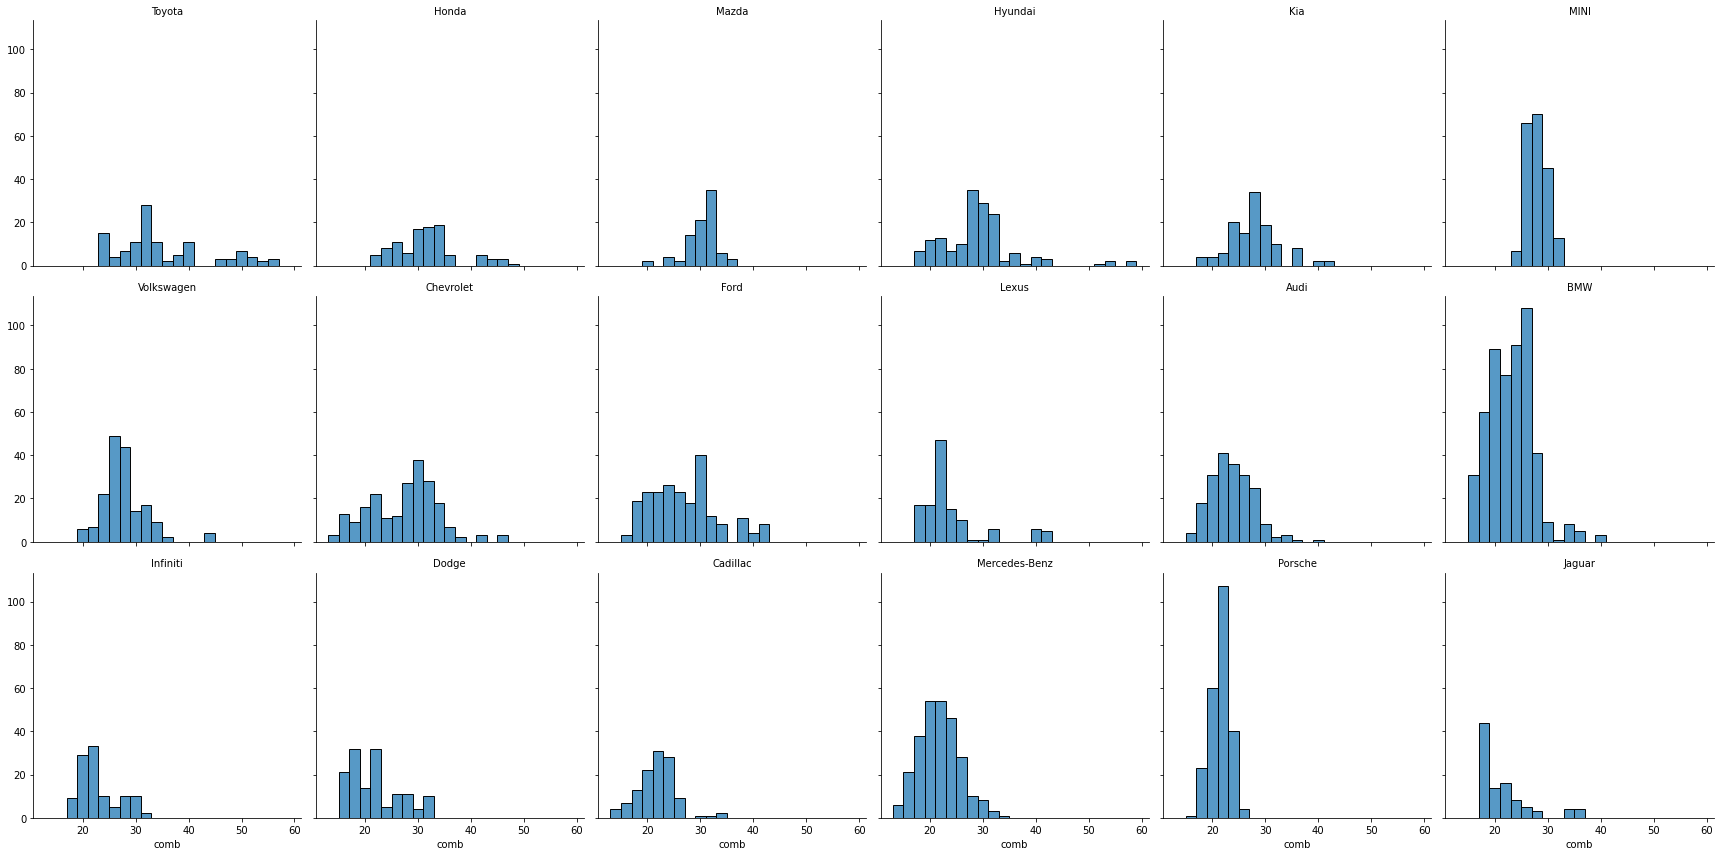

In [122]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges)
g.set_titles('{col_name}');

**Trial 3: Use `sns.histplot(stat='density')` function.**

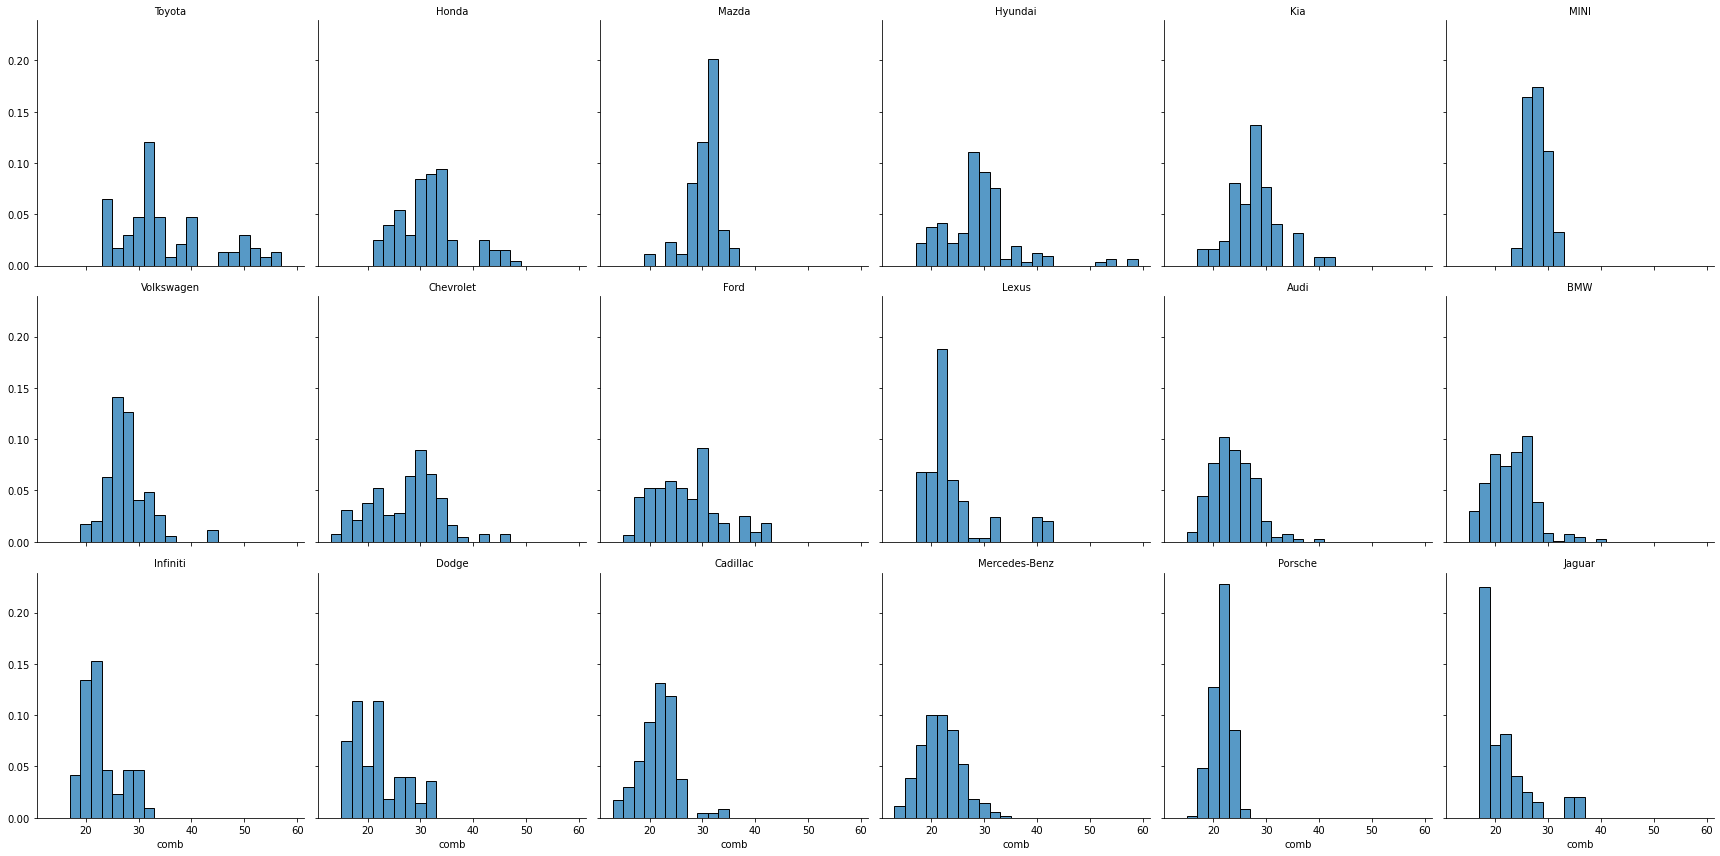

In [128]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges, stat='density')
g.set_titles('{col_name}');

**Trial 4: Use `sns.histplot(stat='density', kde=True)` function - with kde.**

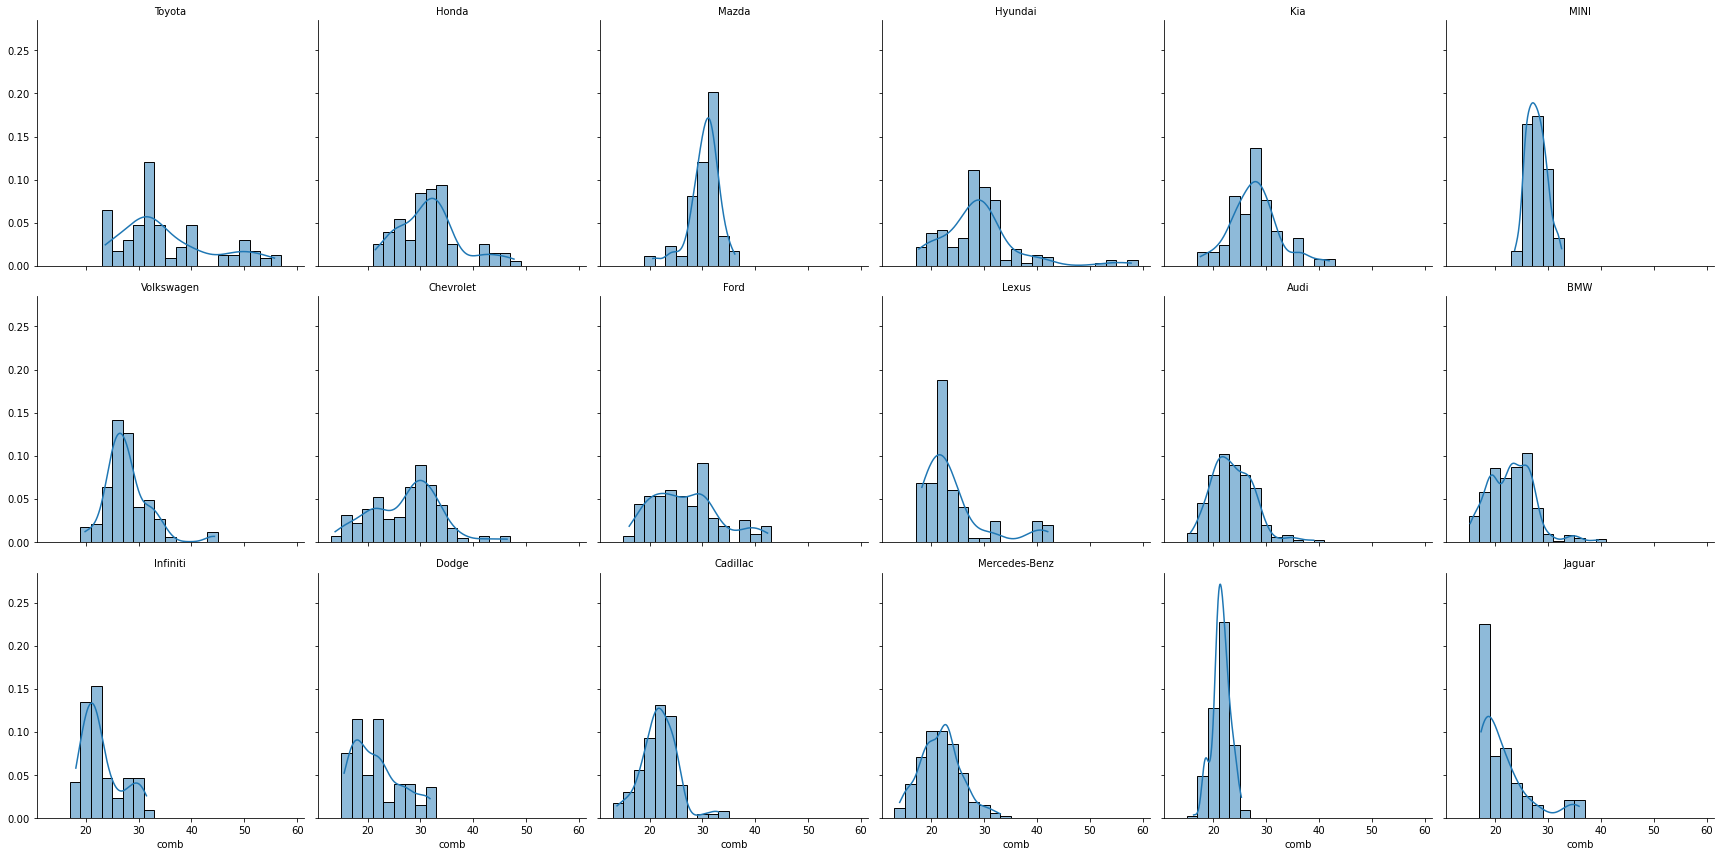

In [131]:
g = sns.FacetGrid(data=most_makes, col='make', col_wrap=6, height=4, col_order=facet_order)
g.map(sns.histplot, 'comb', bins=bin_edges, stat='density', kde=True)
g.set_titles('{col_name}');

### Example 5a: Use facet plots to study on the relationship between `displacement` and `efficiency` by different car types.

In [133]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### Preparatory Step 1: Extract the transmission type from `trans` column and create a new feature called `trans_type`.

In [139]:
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x: x.split(' ')[0])

# Verification
fuel_econ.trans_type.value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

#### Preparatory Step 2: Be sure that `VClass` column has been converted to categorical data type.

In [140]:
fuel_econ.VClass.dtypes

CategoricalDtype(categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars',
                  'Midsize Cars', 'Large Cars'],
                 ordered=True)

#### Step 3: Facet Plots I - Relationship between `displacement` and `efficiency` by car types.

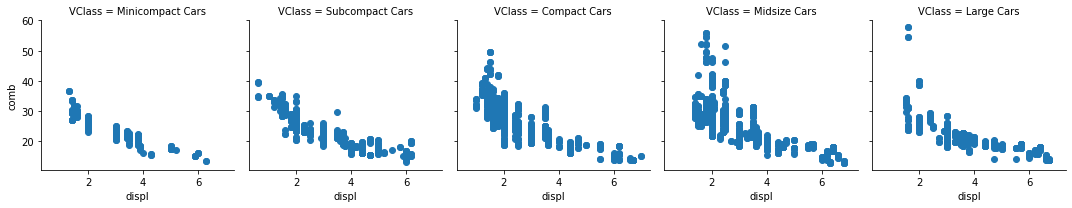

In [142]:
f = sns.FacetGrid(data=fuel_econ, col='VClass')

f.map(plt.scatter, 'displ', 'comb');

#### Step 4: Facet Plots II - Relationship between `displacement` and `efficiency` by car types (column-wise) and transmission types (row-wise).

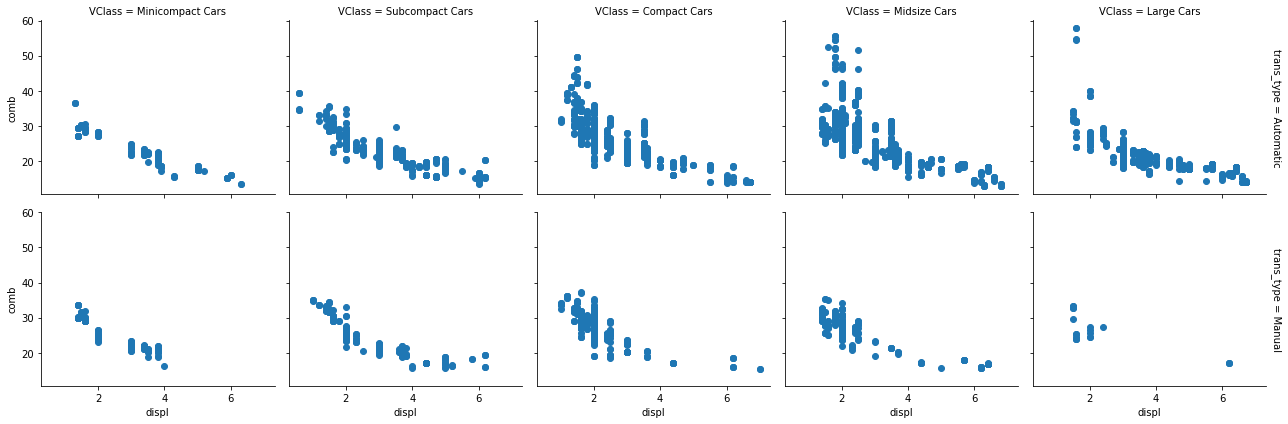

In [155]:
f = sns.FacetGrid(data=fuel_econ, \
                  col='VClass', \
                  row='trans_type', \
                  margin_titles=True, \
                  height=3, \
                  aspect=1.2)

f.map(plt.scatter, 'displ', 'comb');

### Example 5b: Use facet plots to study on the relationship between `displacement` and `efficiency` by different car types and transmission types.